Data preparation

In [7]:
!pip install contextily


In [1316]:
pip install matplotlib-scalebar

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import contextily as ctx
import geopandas as gpd

from scipy.stats import skew 
from matplotlib_scalebar.scalebar import ScaleBar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
#loading csv file 
#active grandmaster up to Mar 2025
grandmaster_csvFile ="C:/Users/user/Desktop/GEOG0115_Report/active_grandmasters_March25.csv"
grandmaster_df = pd.read_csv(grandmaster_csvFile)
grandmaster_df

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,Rating,Gms,B-day
0,1503014,"Carlsen, Magnus",NOR,M,GM,NaN,NaN,2833,0,1990
1,2016192,"Nakamura, Hikaru",USA,M,GM,NaN,NaN,2802,0,1987
2,46616543,Gukesh D,IND,M,GM,NaN,NaN,2787,13,2006
3,2020009,"Caruana, Fabiano",USA,M,GM,NaN,NaN,2783,13,1992
4,35009192,Erigaisi Arjun,IND,M,GM,NaN,NaN,2777,13,2003
...,...,...,...,...,...,...,...,...,...,...
1298,2900165,"Popchev, Milko",BUL,M,GM,NaN,NaN,2157,28,1964
1299,4104307,"Vul, Arkadi Eremeevich",RUS,M,GM,NaN,NaN,2146,0,1953
1300,4117131,"Pushkov, Nikolai",RUS,M,GM,NaN,NaN,2119,0,1946
1301,2015323,"Ziatdinov, Raset",USA,M,GM,NaN,NaN,2041,0,1958


In [13]:
# per capita GDP in 2024 
percapita_csvFile = "C:/Users/user/Desktop/GEOG0115_Report/GDP_per_capita_2025.csv"
percapita_df = pd.read_csv(percapita_csvFile)
percapita_df

,Series_Name,Series_Code,Country_Name,Country_Code,2024
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,11377.77574
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,5752.990767
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,49303.64917
...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


In [15]:
grandmaster_df["age"] = 2026 - grandmaster_df["B-day"]
grandmaster_df = grandmaster_df[grandmaster_df["Tit"] == "GM"]
grandmaster_df.head()

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,Rating,Gms,B-day,age
0,1503014,"Carlsen, Magnus",NOR,M,GM,NaN,NaN,2833,0,1990,36
1,2016192,"Nakamura, Hikaru",USA,M,GM,NaN,NaN,2802,0,1987,39
2,46616543,Gukesh D,IND,M,GM,NaN,NaN,2787,13,2006,20
3,2020009,"Caruana, Fabiano",USA,M,GM,NaN,NaN,2783,13,1992,34
4,35009192,Erigaisi Arjun,IND,M,GM,NaN,NaN,2777,13,2003,23


In [17]:
col_to_del = ["ID Number", "Name", "Tit", "WTit", "OTit", "Gms"] 

In [19]:
grandmaster_df = grandmaster_df.drop(columns=col_to_del)

In [21]:
grandmaster_df.head()

,Fed,Sex,Rating,B-day,age
0,NOR,M,2833,1990,36
1,USA,M,2802,1987,39
2,IND,M,2787,2006,20
3,USA,M,2783,1992,34
4,IND,M,2777,2003,23


In [23]:
percapita_df.head()

,Series_Name,Series_Code,Country_Name,Country_Code,2024
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,11377.77574
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,5752.990767
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,49303.64917


In [25]:
percapita_cols_to_drop = ['Series_Name', 'Series_Code', 'Country_Name']

In [27]:
percapita_df = percapita_df.drop(columns=percapita_cols_to_drop)

In [29]:
percapita_df.head()

,Country_Code,2024
0,AFG,..
1,ALB,11377.77574
2,DZA,5752.990767
3,ASM,..
4,AND,49303.64917


In [31]:
percapita_df["2024"] = pd.to_numeric(percapita_df["2024"], errors="coerce")

In [33]:
percapita_df = percapita_df.dropna(subset=["2024"])

In [35]:
percapita_df = percapita_df.rename(columns={"2024": "gdp_per_capita"})

In [37]:
percapita_df.head()

,Country_Code,gdp_per_capita
1,ALB,11377.775740
2,DZA,5752.990767
4,AND,49303.649170
5,AGO,2665.874448
6,ATG,23542.452690


In [39]:
internetaccess_csv = "C:/Users/user/Desktop/GEOG0115_Report/Individual_using_internet_2023.csv"

In [41]:
internetaccess_df = pd.read_csv(internetaccess_csv)
internetaccess_df

,Series Name,Series Code,Country Name,Country Code,2023 [YR2023]
0,Individuals using the Internet (% of population),IT.NET.USER.ZS,Afghanistan,AFG,17.7089
1,Individuals using the Internet (% of population),IT.NET.USER.ZS,Albania,ALB,83.1356
2,Individuals using the Internet (% of population),IT.NET.USER.ZS,Algeria,DZA,76.9081
3,Individuals using the Internet (% of population),IT.NET.USER.ZS,American Samoa,ASM,..
4,Individuals using the Internet (% of population),IT.NET.USER.ZS,Andorra,AND,95.4456
...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


In [42]:
internetaccess_col_del =  ['Series Name', 'Series Code', 'Country Name']

In [45]:
internetaccess_df = internetaccess_df.drop(columns = internetaccess_col_del)
internetaccess_df

,Country Code,2023 [YR2023]
0,AFG,17.7089
1,ALB,83.1356
2,DZA,76.9081
3,ASM,..
4,AND,95.4456
...,...,...
266,NaN,NaN
267,NaN,NaN
268,NaN,NaN
269,NaN,NaN


In [47]:
internetaccess_df = internetaccess_df.dropna(subset=["2023 [YR2023]"])
internetaccess_df

,Country Code,2023 [YR2023]
0,AFG,17.7089
1,ALB,83.1356
2,DZA,76.9081
3,ASM,..
4,AND,95.4456
...,...,...
261,SSF,32.3
262,SSA,33.5
263,TSS,32.1
264,UMC,85.3


In [49]:
internetaccess_df = internetaccess_df.rename(columns={"2023 [YR2023]": "internetaccess_rate"})
internetaccess_df.head()

,Country Code,internetaccess_rate
0,AFG,17.7089
1,ALB,83.1356
2,DZA,76.9081
3,ASM,..
4,AND,95.4456


In [51]:
internetaccess_df['internetaccess_rate'] = pd.to_numeric(
    internetaccess_df['internetaccess_rate'],
    errors='coerce')

In [53]:
internetaccess_df.head()

,Country Code,internetaccess_rate
0,AFG,17.7089
1,ALB,83.1356
2,DZA,76.9081
3,ASM,NaN
4,AND,95.4456


In [55]:
#Matching country code between data 

In [57]:
fed_to_iso3 = {
    "ALG": "DZA",  
    "BAN": "BGD",  
    "BUL": "BGR",  
    "CRO": "HRV",  
    "DEN": "DNK", 
    "GER": "DEU", 
    "GRE": "GRC", 
    "INA": "IDN",  
    "IRI": "IRN",  
    "LAT": "LVA",
    "MGL": "MNG", 
    "MNC": "MCO", 
    "NED": "NLD",  
    "PAR": "PRY",
    "PHI": "PHL",  
    "POR": "PRT",  
    "RSA": "ZAF",  
    "SLO": "SVN",  
    "SUI": "CHE",  
    "TPE": "TWN",  
    "UAE": "ARE",  
    "URU": "URY",  
    "VIE": "VNM",  
    "ENG": "GBR",  
    "SCO": "GBR",  
    "WLS": "GBR",  
    "FAI": "FRO",  
    "FID": "FJI", }

In [59]:
grandmaster_df["iso3"] = grandmaster_df["Fed"].replace(fed_to_iso3)

In [61]:
grandmaster_df = grandmaster_df.merge(
    internetaccess_df,
    left_on='Fed',
    right_on='Country Code',
    how='left')

In [63]:
grandmaster_df = grandmaster_df.merge(
    percapita_df,
    left_on="Fed",
    right_on="Country_Code",
    how="left")

In [65]:
grandmaster_df

,Fed,Sex,Rating,B-day,age,iso3,Country Code,internetaccess_rate,Country_Code,gdp_per_capita
0,NOR,M,2833,1990,36,NOR,NOR,99.0000,NOR,86785.433450
1,USA,M,2802,1987,39,USA,USA,93.1444,USA,84534.040780
2,IND,M,2787,2006,20,IND,IND,NaN,IND,2694.737809
3,USA,M,2783,1992,34,USA,USA,93.1444,USA,84534.040780
4,IND,M,2777,2003,23,IND,IND,NaN,IND,2694.737809
...,...,...,...,...,...,...,...,...,...,...
1298,BUL,M,2157,1964,62,BGR,NaN,NaN,NaN,NaN
1299,RUS,M,2146,1953,73,RUS,RUS,92.2450,RUS,14889.018550
1300,RUS,M,2119,1946,80,RUS,RUS,92.2450,RUS,14889.018550
1301,USA,M,2041,1958,68,USA,USA,93.1444,USA,84534.040780


In [67]:
#deleting extra country code cols 
grandmaster_df = grandmaster_df.drop(
    columns=['Country_Code', 'Country Code'],
    errors='ignore')

In [69]:
grandmaster_df.head()

,Fed,Sex,Rating,B-day,age,iso3,internetaccess_rate,gdp_per_capita
0,NOR,M,2833,1990,36,NOR,99.0000,86785.433450
1,USA,M,2802,1987,39,USA,93.1444,84534.040780
2,IND,M,2787,2006,20,IND,NaN,2694.737809
3,USA,M,2783,1992,34,USA,93.1444,84534.040780
4,IND,M,2777,2003,23,IND,NaN,2694.737809


In [71]:
grandmaster_df= grandmaster_df.dropna(subset=["gdp_per_capita"])

In [73]:
grandmaster_df= grandmaster_df.dropna(subset=["internetaccess_rate"])

In [75]:
grandmaster_df

,Fed,Sex,Rating,B-day,age,iso3,internetaccess_rate,gdp_per_capita
0,NOR,M,2833,1990,36,NOR,99.0000,86785.433450
1,USA,M,2802,1987,39,USA,93.1444,84534.040780
3,USA,M,2783,1992,34,USA,93.1444,84534.040780
5,UZB,M,2773,2004,22,UZB,89.0136,3161.700106
6,CHN,M,2760,1999,27,CHN,90.6000,13303.148150
...,...,...,...,...,...,...,...,...
1296,GEO,F,2193,1941,85,GEO,81.8843,9241.491223
1297,RUS,M,2167,1959,67,RUS,92.2450,14889.018550
1299,RUS,M,2146,1953,73,RUS,92.2450,14889.018550
1300,RUS,M,2119,1946,80,RUS,92.2450,14889.018550


In [77]:
grandmaster_df.isna().sum()

Fed                    0
Sex                    0
Rating                 0
B-day                  0
age                    0
iso3                   0
internetaccess_rate    0
gdp_per_capita         0
dtype: int64

In [78]:
#Table summarising dependent and independent variables 
grandmaster_df[["Rating", "age", "gdp_per_capita", "internetaccess_rate"]].describe()

,Rating,age,gdp_per_capita,internetaccess_rate
count,870.000000,870.000000,870.000000,870.000000
mean,2481.100000,43.739080,31148.173570,88.935078
std,110.040532,14.328698,25325.448257,5.091848
min,2041.000000,15.000000,3161.700106,70.236800
25%,2411.250000,33.000000,13303.148150,85.994000
50%,2485.000000,41.000000,23292.326390,89.013600
75%,2552.000000,54.000000,46103.084090,92.878500
max,2833.000000,85.000000,112894.953200,99.830100


In [79]:
#map: Distribution of active grandmaster in each country

In [80]:
world_shpfile = "C:/Users/user/Desktop/GEOG0115_Report/WB_GAD_ADM0_complete.shp"

In [82]:
#world shapefile
world = gpd.read_file(world_shpfile)

In [86]:
list(world.columns)

['ISO_A3',
 'ISO_A2',
 'WB_A3',
 'HASC_0',
 'GAUL_0',
 'WB_REGION',
 'WB_STATUS',
 'SOVEREIGN',
 'NAM_0',
 'geometry']

In [87]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ISO_A3     268 non-null    object  
 1   ISO_A2     268 non-null    object  
 2   WB_A3      262 non-null    object  
 3   HASC_0     259 non-null    object  
 4   GAUL_0     288 non-null    int64   
 5   WB_REGION  264 non-null    object  
 6   WB_STATUS  288 non-null    object  
 7   SOVEREIGN  264 non-null    object  
 8   NAM_0      288 non-null    object  
 9   geometry   288 non-null    geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 22.6+ KB


In [88]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [129]:
no_active_gm_per_country = (
    grandmaster_df
    .groupby("iso3")
    .size()
    .reset_index(name="no_of_active_gm"))

In [131]:
active_gm = world.merge(
    no_active_gm_per_country,
    left_on="ISO_A3",
    right_on="iso3",
    how="left")
active_gm.head()

,ISO_A3,ISO_A2,WB_A3,HASC_0,GAUL_0,WB_REGION,WB_STATUS,SOVEREIGN,NAM_0,geometry,iso3,no_of_active_gm
0,CHN,CN,CHN,CN,147295,EAP,Member State,CHN,China,"MULTIPOLYGON (((117.58675 38.59517, 117.58909 ...",CHN,37.0
1,JPN,JP,JPN,JP,126,Other,Member State,JPN,Japan,"MULTIPOLYGON (((137.48411 34.67386, 137.46683 ...",NaN,NaN
2,KOR,KR,KOR,KR,202,EAP,Member State,KOR,Republic of Korea,"MULTIPOLYGON (((126.05363 36.19852, 126.05372 ...",NaN,NaN
3,PRK,KP,PRK,KP,67,Other,Non Member State,PRK,D. P. R. of Korea,"MULTIPOLYGON (((126.95508 38.16282, 126.95184 ...",NaN,NaN
4,RUS,RU,RUS,RU,204,ECA,Member State,RUS,Russian Federation,"MULTIPOLYGON (((130.61904 48.88019, 130.60659 ...",RUS,71.0


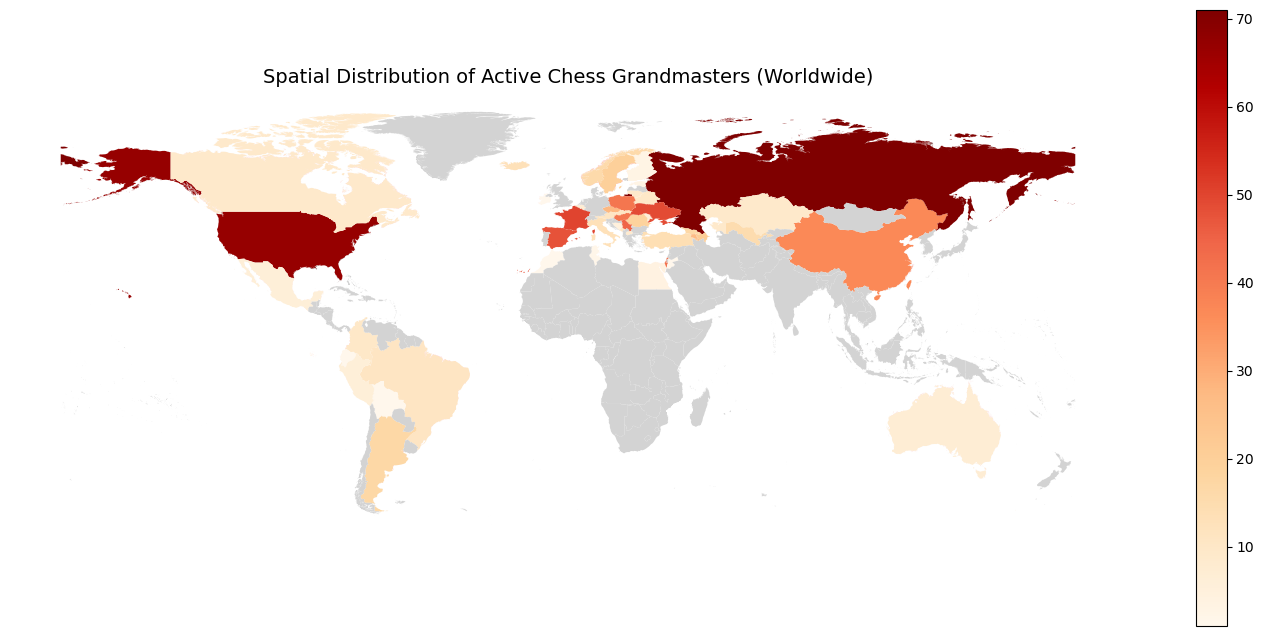

In [133]:
#plot: distribution of active grandmaster worldwide
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

active_gm.plot(
    column="no_of_active_gm",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={
        "color": "lightgrey",
        "label": "No. of active grandmasters"})

ax.set_title(
    "Spatial Distribution of Active Chess Grandmasters (Worldwide)",fontsize=14)
ax.axis("off")

plt.show()

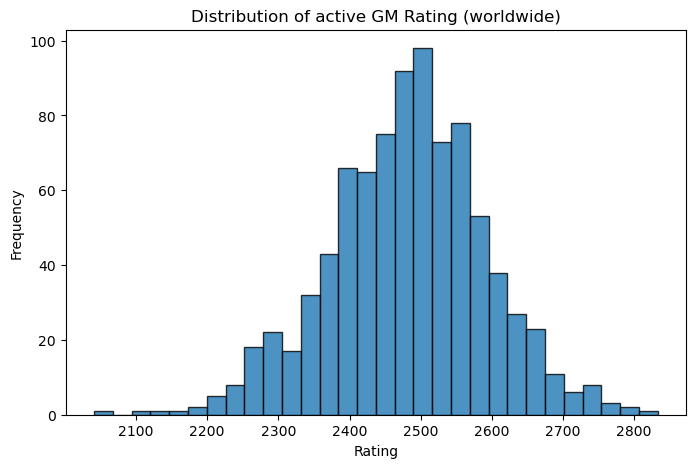

In [135]:
#Plot: Active GM rating histogtram
plt.figure(figsize=(8, 5))

plt.hist(
    grandmaster_df['Rating'],
    bins=30,
    edgecolor='black',
    alpha=0.8)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of active GM Rating (worldwide)')

plt.show()

In [137]:
#average rating in each country
rating_by_country = (
    grandmaster_df.groupby('iso3', as_index=False)
    .agg(mean_rating=('Rating', 'mean')))

In [139]:
active_gm = world.merge(rating_by_country, left_on='ISO_A3', right_on='iso3', how='left')
active_gm.head()

,ISO_A3,ISO_A2,WB_A3,HASC_0,GAUL_0,WB_REGION,WB_STATUS,SOVEREIGN,NAM_0,geometry,iso3,mean_rating
0,CHN,CN,CHN,CN,147295,EAP,Member State,CHN,China,"MULTIPOLYGON (((117.58675 38.59517, 117.58909 ...",CHN,2561.918919
1,JPN,JP,JPN,JP,126,Other,Member State,JPN,Japan,"MULTIPOLYGON (((137.48411 34.67386, 137.46683 ...",NaN,NaN
2,KOR,KR,KOR,KR,202,EAP,Member State,KOR,Republic of Korea,"MULTIPOLYGON (((126.05363 36.19852, 126.05372 ...",NaN,NaN
3,PRK,KP,PRK,KP,67,Other,Non Member State,PRK,D. P. R. of Korea,"MULTIPOLYGON (((126.95508 38.16282, 126.95184 ...",NaN,NaN
4,RUS,RU,RUS,RU,204,ECA,Member State,RUS,Russian Federation,"MULTIPOLYGON (((130.61904 48.88019, 130.60659 ...",RUS,2474.028169


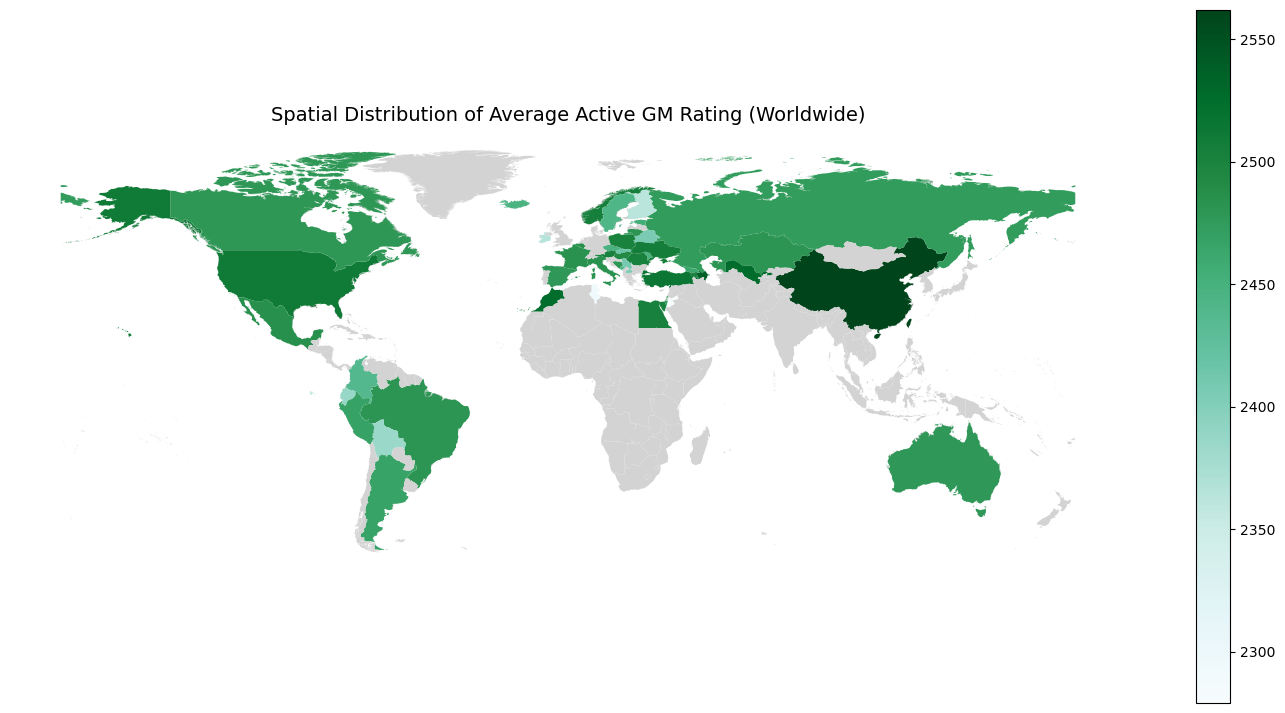

In [140]:
#Plot: Spatial distribution of active GM Rating (worldwide) 
fig, ax = plt.subplots(1, 1, figsize=(18, 9))

active_gm.plot(
    column='mean_rating',
    ax=ax,
    legend=True,
    cmap='BuGn',
    missing_kwds={"color": "lightgrey", "label": "Average Active GM Rating"})

ax.set_title("Spatial Distribution of Average Active GM Rating (Worldwide)", fontsize=14)
ax.axis("off")
plt.show()

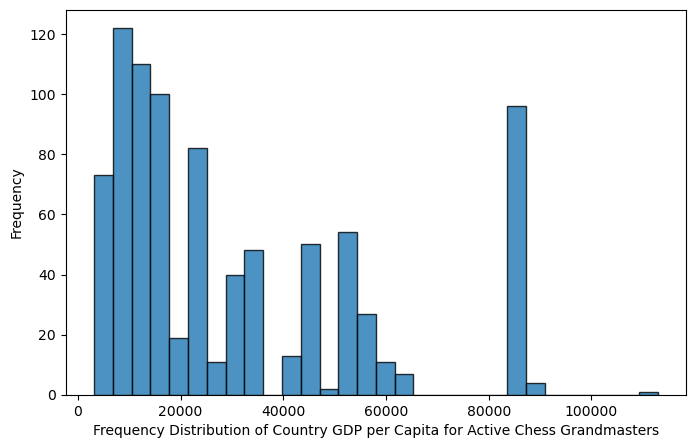

In [141]:
#Plot: Frequency Distribution of Country GDP per Capita for Active Chess Grandmasters 
plt.figure(figsize=(8, 5))

plt.hist(
    grandmaster_df['gdp_per_capita'],
    bins=30,
    edgecolor='black',
    alpha=0.8)

plt.xlabel('Frequency Distribution of Country GDP per Capita for Active Chess Grandmasters')
plt.ylabel('Frequency')
plt.title('')

plt.show()

In [142]:
gdp_by_country = (
    grandmaster_df[['iso3', 'gdp_per_capita']]
    .drop_duplicates())

In [143]:
world_gdp = world.merge(
    gdp_by_country,
    left_on='ISO_A3',
    right_on='iso3',
    how='left')

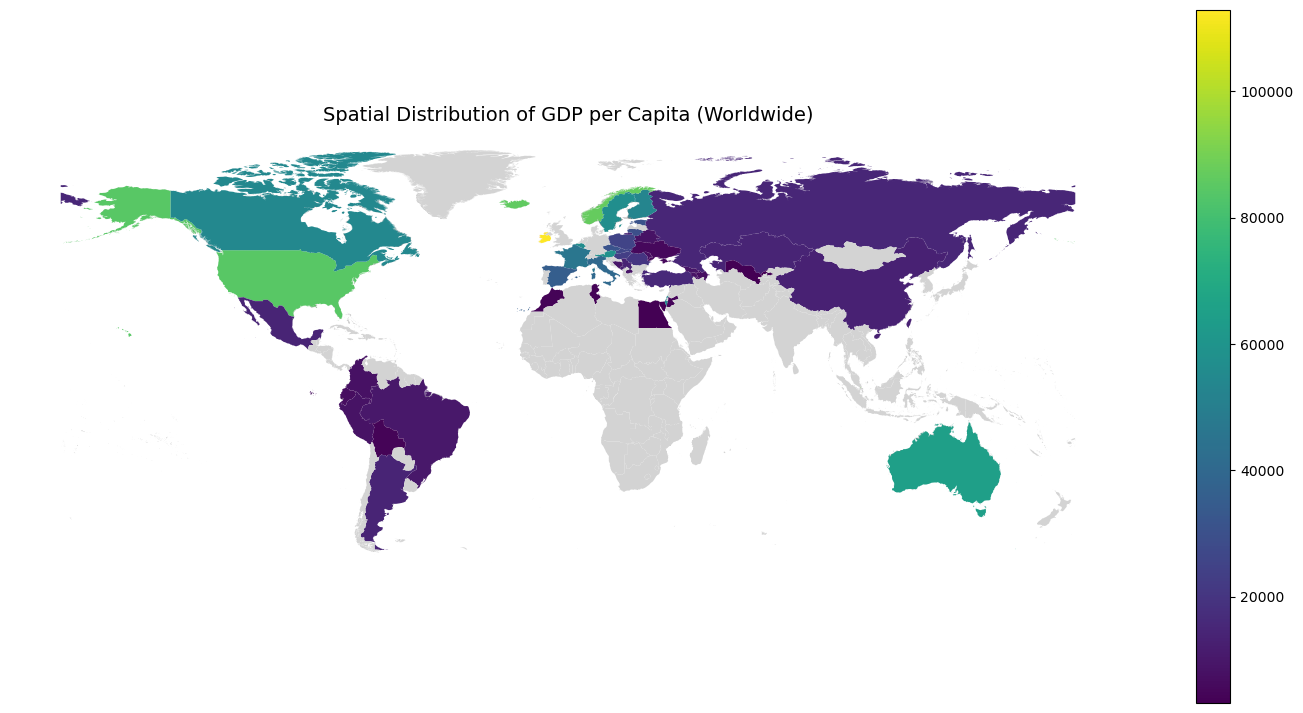

In [144]:
#plot: Distribution of GDP per capita (worldwide) (dependent variable observation)
fig, ax = plt.subplots(1, 1, figsize=(18, 9))

world_gdp.plot(
    column='gdp_per_capita',
    ax=ax,
    legend=True,
    cmap='viridis',   
    missing_kwds={
        "color": "lightgrey",
        "label": "No data" } )

ax.set_title(
    "Spatial Distribution of GDP per Capita (Worldwide)",
    fontsize=14)
ax.axis("off")
plt.show()

<Axes: xlabel='Sex', ylabel='Rating'>

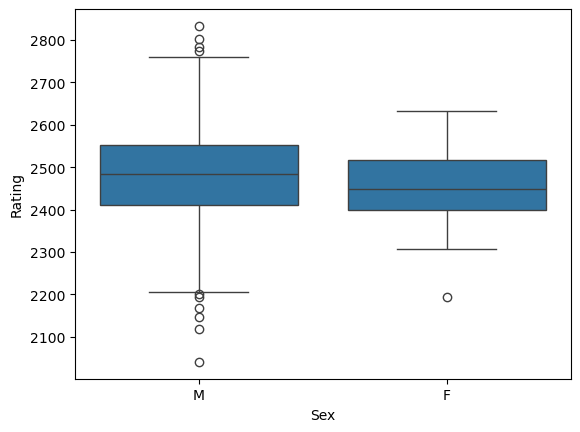

In [145]:
#box plot: Gender ineqaulity : Relationship between Rating and Gender
sns.boxplot(data=grandmaster_df, x="Sex", y="Rating")

In [146]:
#Final data wrangle: categorical data
grandmaster_df['gender'] = grandmaster_df['Sex'].map({'M': 0, 'F': 1})

In [147]:
grandmaster_df.head()

,Fed,Sex,Rating,B-day,age,iso3,internetaccess_rate,gdp_per_capita,gender
0,NOR,M,2833,1990,36,NOR,99.0000,86785.433450,0
1,USA,M,2802,1987,39,USA,93.1444,84534.040780,0
3,USA,M,2783,1992,34,USA,93.1444,84534.040780,0
5,UZB,M,2773,2004,22,UZB,89.0136,3161.700106,0
6,CHN,M,2760,1999,27,CHN,90.6000,13303.148150,0


In [148]:
grandmaster_df = grandmaster_df.drop(columns=['Sex'])

In [149]:
grandmaster_df.head()

,Fed,Rating,B-day,age,iso3,internetaccess_rate,gdp_per_capita,gender
0,NOR,2833,1990,36,NOR,99.0000,86785.433450,0
1,USA,2802,1987,39,USA,93.1444,84534.040780,0
3,USA,2783,1992,34,USA,93.1444,84534.040780,0
5,UZB,2773,2004,22,UZB,89.0136,3161.700106,0
6,CHN,2760,1999,27,CHN,90.6000,13303.148150,0


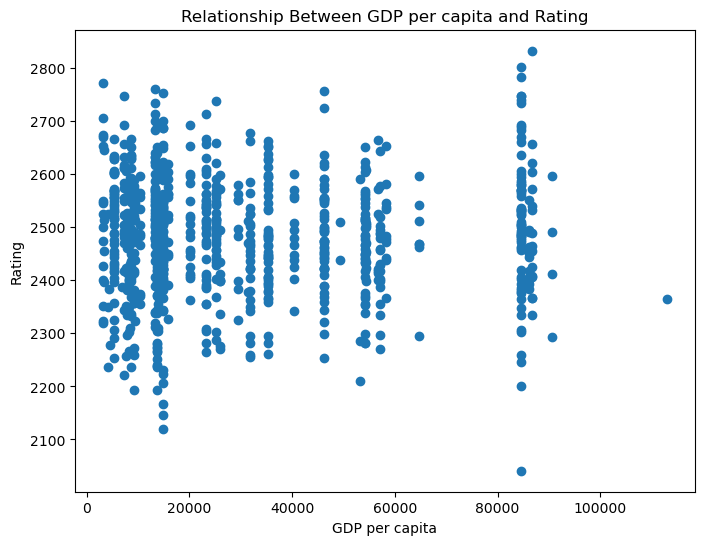

In [150]:
#Scatterplot: Relationship between gdp per capita and Rating
plt.figure(figsize=(8, 6))

plt.scatter(
    grandmaster_df['gdp_per_capita'],
    grandmaster_df['Rating'])

plt.ylabel('Rating')
plt.xlabel('GDP per capita')
plt.title('Relationship Between GDP per capita and Rating')

plt.show()





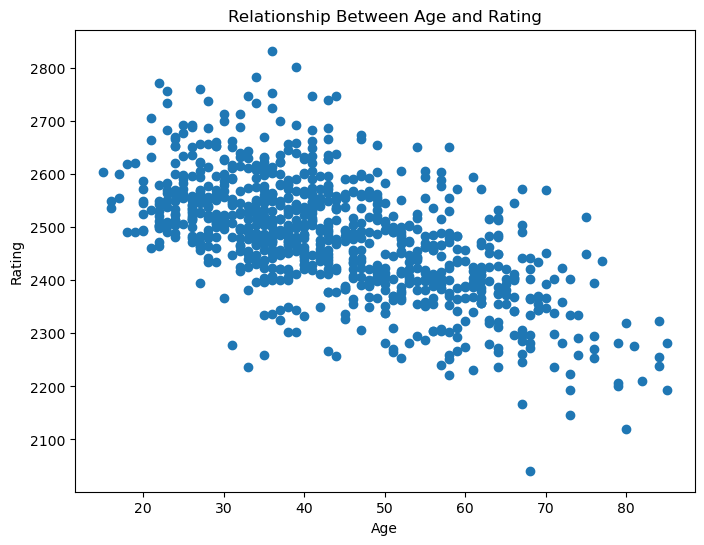

In [151]:
#Scatterplot: Relationship between age and Rating 
plt.figure(figsize=(8, 6))

plt.scatter(
    grandmaster_df['age'],
    grandmaster_df['Rating'])

plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Relationship Between Age and Rating')

plt.show()

In [152]:
#Variables
X = grandmaster_df[
    ['age', 'gdp_per_capita', 'internetaccess_rate', 'gender']]
y = grandmaster_df['Rating']

In [153]:
skewed = X.apply(lambda col: skew(col.dropna().astype(float)))
skewed = skewed.sort_values(ascending=False)
skewed

gender                 6.201073
gdp_per_capita         1.023384
age                    0.456994
internetaccess_rate   -0.326707
dtype: float64

Right-skewed: ['gdp_per_capita', 'gender']
Left-skewed: []


array([[<Axes: title={'center': 'gdp_per_capita'}>,
        <Axes: title={'center': 'gender'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

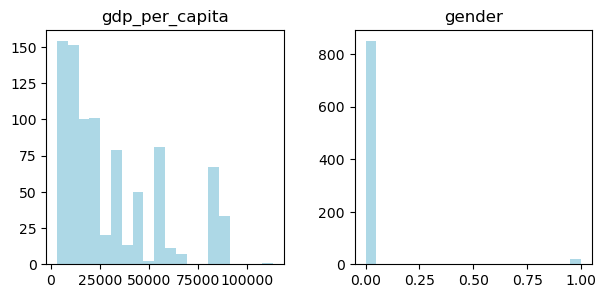

In [172]:
skewed_cont = X.apply(lambda col: skew(col.dropna().astype(float)))

rskewed = skewed_cont[skewed_cont > 0.75].index
lskewed = skewed_cont[skewed_cont < -0.75].index

print("Right-skewed:", list(rskewed))
print("Left-skewed:", list(lskewed))

# right-skewed histograms
X[rskewed].hist(bins=20, figsize=(15, 7), color='lightblue', layout=(2, 4), grid=False)


In [174]:
X['log_gdp_pc'] = np.log(X['gdp_per_capita'])

C:\Users\user\AppData\Local\Temp\ipykernel_32360\1252757175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_gdp_pc'] = np.log(X['gdp_per_capita'])


In [176]:
grandmaster_df['log_gdp_pc'] = np.log(grandmaster_df['gdp_per_capita'])
grandmaster_df.head()

,Fed,Rating,B-day,age,iso3,internetaccess_rate,gdp_per_capita,gender,log_gdp_pc
0,NOR,2833,1990,36,NOR,99.0000,86785.433450,0,11.371194
1,USA,2802,1987,39,USA,93.1444,84534.040780,0,11.344910
3,USA,2783,1992,34,USA,93.1444,84534.040780,0,11.344910
5,UZB,2773,2004,22,UZB,89.0136,3161.700106,0,8.058865
6,CHN,2760,1999,27,CHN,90.6000,13303.148150,0,9.495756


In [178]:
#Correlation matrix 
corr_vars = ["Rating",               
    "age",
    "gender",
    "log_gdp_pc",
    "internetaccess_rate"]
corr_df = grandmaster_df[corr_vars].dropna()

In [180]:
corr = corr_df.corr()
corr

,Rating,age,gender,log_gdp_pc,internetaccess_rate
Rating,1.000000,-0.606027,-0.046926,-0.010404,0.036267
age,-0.606027,1.000000,-0.023283,0.096145,0.042229
gender,-0.046926,-0.023283,1.000000,-0.086804,-0.058222
log_gdp_pc,-0.010404,0.096145,-0.086804,1.000000,0.619182
internetaccess_rate,0.036267,0.042229,-0.058222,0.619182,1.000000


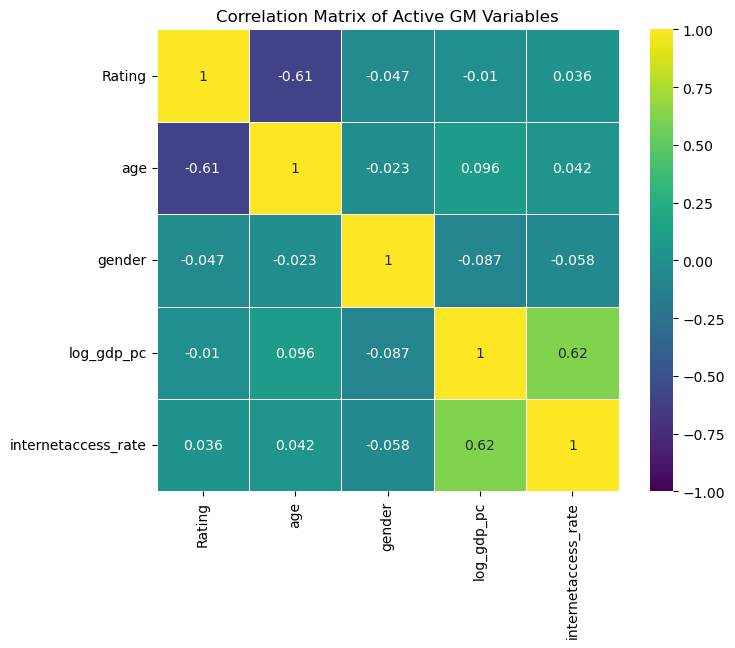

In [182]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    corr,
    center=0,
    cmap=plt.get_cmap("viridis"), 
    square=True,
    linewidths=0.5,
    annot=True,
    vmin=-1,
    vmax=1,
    ax=ax)

ax.set_title("Correlation Matrix of Active GM Variables")
plt.show()

In [183]:
#OLS variables 
X = grandmaster_df[
    ['age', 'gender', 'log_gdp_pc', 'internetaccess_rate']]
y = grandmaster_df['Rating']

In [186]:
#Train and test set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [188]:
model=LinearRegression()

In [190]:
model.fit(X_train,y_train)

LinearRegression()

In [192]:
y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print ('MSE: ',mean_squared_error(y_test,y_pred))
print ('MAE: ',mean_absolute_error(y_test,y_pred))
print ('R2: ', r2_score(y_test,y_pred))

RMSE: 87.54066363277911
MSE:  7663.367789267377
MAE:  67.69096041619068
R2:  0.3297545158815328


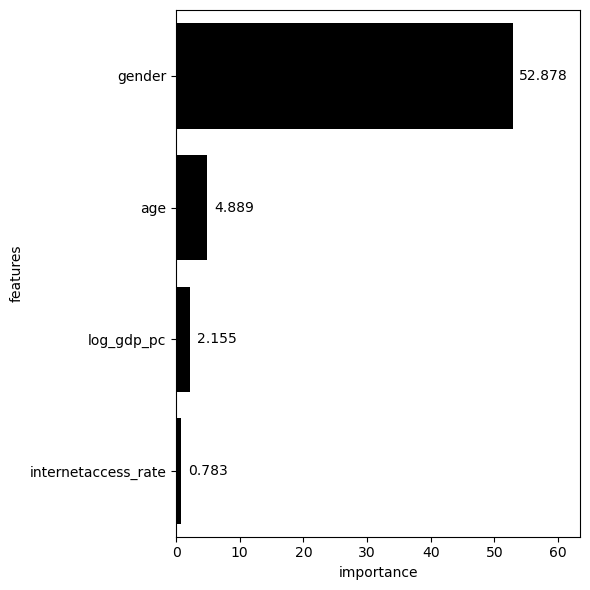

In [224]:
# Coefficient Plot 
coef = pd.DataFrame(model.coef_, index=X.columns)
coef = coef.reset_index()
coef.columns = ['features', 'importance']

coef['importance'] = np.abs(coef['importance'])
coef = coef.sort_values(by='importance', ascending=False)

plt.figure(figsize=(6,6))
ax = sns.barplot(x='importance', y='features', data=coef, color='black')

# Add labels
for i, v in enumerate(coef['importance']):
    ax.text(v + coef['importance'].max()*0.02,  # small offset
            i,
            f"{v:.3f}",
            va='center')

plt.xlim(0, coef['importance'].max() * 1.2)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_32360\2557477552.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_resid)


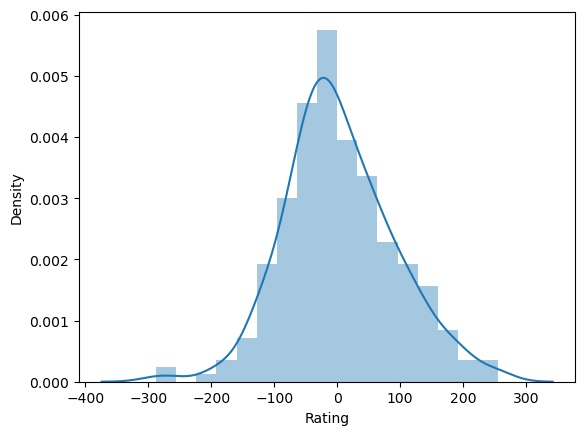

In [196]:
#residuals for OLS regression 
y_resid = y_test - y_pred
sns.distplot(y_resid)
plt.show()

In [198]:
y_resid_high = y_resid[y_resid>10].sort_values(ascending=False)
y_resid_high

10      255.699529
14      249.950504
3       247.947299
48      213.823166
68      198.732828
           ...    
806      16.973539
1205     16.458079
606      16.175847
420      15.419877
816      11.898311
Name: Rating, Length: 109, dtype: float64

In [200]:
y_resid_low = y_resid[y_resid<-10]
y_resid_low

590     -62.204226
739     -98.960451
1284   -287.715192
1150    -27.637702
1214   -126.281915
           ...    
943     -89.048868
663     -80.388172
1249    -61.523741
1233    -69.969966
1224   -107.580236
Name: Rating, Length: 126, dtype: float64

In [202]:
#Decision tree regression 

In [206]:
modeltree = DecisionTreeRegressor(max_depth=6)
modeltree.fit(X_train, y_train)
y_pred=modeltree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print ('MSE: ',mean_squared_error(y_test,y_pred))
print ('MAE: ',mean_absolute_error(y_test,y_pred))
print ('R2: ', r2_score(y_test,y_pred))

RMSE: 93.00833932193673
MSE:  8650.551183424523
MAE:  71.05461256579294
R2:  0.24341451105268685
